In [233]:
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm
import statsmodels.api as sm
from sklearn import linear_model
import warnings
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import re

DATASET

[105.84  28.92  98.64  55.56 128.04  45.6   67.8  105.12  48.48  51.84
 173.4   51.96  54.12  68.64  93.12  68.88  84.12  68.64  41.52 127.92
  42.12  17.88  33.  ] 



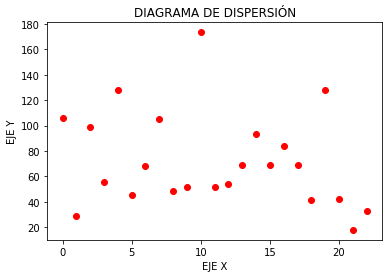

In [234]:
vector = []
y = []

def Archivo ():

    data = open ('data.txt', 'r') #Apertura del archivo
    for i in data.readlines(): #Recorrera todos los valores del archivo
        vector.append(re.findall(r'[\d]+[.][\d]+',i))#Identificar todo aquello que sea numero
    return np.array(vector,dtype=float)

vector = Archivo() #Se guarda el procesado de la función
y = vector[:,0]
n = len(vector)


eX = np.array([[i]for i in range(len(vector))])

print ("DATASET\n")
print (y,"\n")

plt.scatter(eX, y, color = "red")
plt.xlabel('EJE X')
plt.title("DIAGRAMA DE DISPERSIÓN")
plt.ylabel('EJE Y')
plt.show()

def linearRegression ():

    # Creo un modelo de regresión lineal
    modelo = linear_model.LinearRegression()
    # Entreno el modelo con los datos (X,Y)
    modelo.fit(eX, y)
    y_pred = modelo.predict(eX)


    plt.scatter(eX, y, label = "Datos", color = "red")
    plt.xlabel("EJE X")
    plt.ylabel("EJE Y")
    plt.title("REGRESIÓN LINEAL")
    plt.plot(eX, y_pred, color='yellow', linewidth = 3, label = "Recta")
    plt.legend()
    plt.show()

    print("Intercepto ", modelo.intercept_)
    print("Pendiente ", modelo.coef_)
    print("Precisión del modelo: ", r2_score(y, y_pred))
    print ("\n")

def ajuste():

    media, desviacion = st.norm.fit(y)
    d, pvalor = st.kstest(y,"norm",args=(media,desviacion))

    print ("\n")
    # queremos confianza al 95%
    if pvalor > 0.05:
        print("p-valor: ", pvalor)
        print("Hipotesis Nula")
    else:
        print("p-valor: ", pvalor)
        print("Hipotesis Alternativa")


def autocorrela():
    print ("CONJUNTO DE PUNTOS\n")
    print (sm.graphics.tsa.acf(y))
    sm.graphics.tsa.plot_pacf(y, lags = 9, alpha = 0.05)
    plt.show()    

In [235]:
distributions = [

        "norm",            #Normal (Gaussian)
        "alpha",           #Alpha
        "anglit",          #Anglit
        "beta",            #Beta
        "betaprime",       #Beta Prime
        "bradford",        #Bradford
        "burr",            #Burr
        "cauchy",          #Cauchy
        "chi2",            #Chi-squared
        "cosine",          #Cosine
        "dgamma",          #Double Gamma
        "dweibull",        #Double Weibull
        "expon",           #Exponential
        "exponweib",       #Exponentiated Weibull
        "exponpow",        #Exponential Power
        "exponnorm",
        "fatiguelife",     #Fatigue Life (Birnbaum-Sanders)
        "foldcauchy",      #Folded Cauchy
        "fisk",            #Fisk
        "gamma",           #Gamma
        "gausshyper",      #Gauss Hypergeometric
        "genexpon",        #Generalized Exponential
        "genextreme",      #Generalized Extreme Value
        "gengamma",        #Generalized gamma
        "genlogistic",     #Generalized Logistic
        "genpareto",       #Generalized Pareto
        "genhalflogistic", #Generalized Half Logistic
        "gilbrat",         #Gilbrat
        "gompertz",        #Gompertz (Truncated Gumbel)
        "gumbel_l",        #Left Sided Gumbel, etc.
        "gumbel_r",        #Right Sided Gumbel
        "halfcauchy",      #Half Cauchy
        "halflogistic",    #Half Logistic
        "halfnorm",        #Half Normal
        "hypsecant",       #Hyperbolic Secant
        "invgamma",        #Inverse Gamma
        "invweibull",      #Inverse Weibull
        "johnsonsb",       #Johnson SB
        "johnsonsu",       #Johnson SU
        "laplace",         #Laplace
        "logistic",        #Logistic
        "loggamma",        #Log-Gamma
        "loglaplace",      #Log-Laplace (Log Double Exponential)
        "lognorm",         #Log-Normal
        "lomax",           #Lomax (Pareto of the second kind)
        "maxwell",         #Maxwell
        "mielke",          #Mielke's Beta-Kappa
        "nakagami",        #Nakagami
        "ncx2",            #Non-central chi-squared
        "ncf",             #Non-central F
        "nct",             #Non-central Student's T
        "pareto",          #Pareto
        "powerlaw",        #Power-function
        "powerlognorm",
        "rdist",           #R distribution
        "rayleigh",        #Rayleigh
        "rice",            #Rice
        "recipinvgauss",   #Reciprocal Inverse Gaussian
        "semicircular",    #Semicircular
        "t",               #Student's T
        "triang",          #Triangular
        "truncexpon",      #Truncated Exponential
        "tukeylambda",     #Tukey-Lambda
        "uniform",         #Uniform
        "wald",            #Wald
        "weibull_min",     #Minimum Weibull (see Frechet)
        "kstwobign"        #Kolmogorov-Smirnov two-sided test for Large N
    ]  

In [236]:
def distribuciones(data):
    
    dist_results = []
    for dist_name in distributions:
        
        warnings.filterwarnings('ignore')
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        D, p = st.kstest(data, dist_name, args=param);
        dist_results.append((dist_name,p))
    aux_p = 0
    aux_dist = ""
    print("RESULTS:\n")
    for dist in dist_results:
        if(aux_p<dist[1]):
            aux_p = dist[1]
            aux_dist = dist[0]
        
    print("\nThe distribution associated with the dataset is {0} with p value {1}".format(aux_dist,aux_p))
    
    if aux_p > 0.05:    
        print("Hipotesis Nula")
    else:
        print("Hipotesis Alternativa")

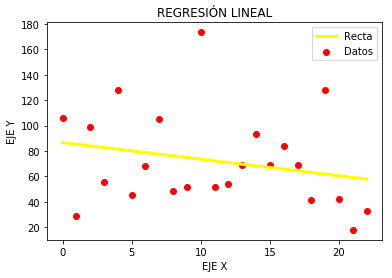

Intercepto  86.61521739130436
Pendiente  [-1.30826087]
Precisión del modelo:  0.056020352022951525


CONJUNTO DE PUNTOS

[ 1.         -0.29748899 -0.11323706  0.08551826  0.10229525 -0.12170118
  0.14808661 -0.0596593  -0.08237838  0.07859561  0.10686717 -0.23448244
  0.0237962   0.00513266 -0.08727942  0.08570029 -0.04023364  0.03858828
 -0.17862745  0.07742854  0.00987205 -0.0041475  -0.04264557]


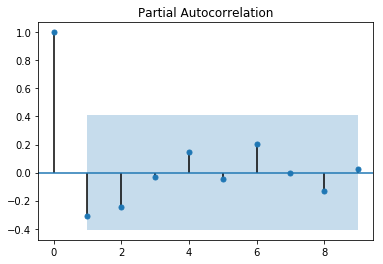



p-valor:  0.34470013292966417
Hipotesis Nula
RESULTS:


The distribution associated with the dataset is exponnorm with p value 0.9975232893852578
Hipotesis Nula


In [237]:
if __name__ == '__main__':
    
    #Regresion lineal
    linearRegression()
    #Grafica de autocorrelación
    autocorrela()
    #Ajuste
    ajuste()
    distribuciones(y)